In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import optuna
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import shap

 

c:\Users\O\Desktop\New folder\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("full_gen_data.csv")

In [3]:
df.head()

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   country         100000 non-null  object 
 1   article         100000 non-null  object 
 2   sales           100000 non-null  int64  
 3   regular_price   100000 non-null  float64
 4   current_price   100000 non-null  float64
 5   ratio           100000 non-null  float64
 6   retailweek      100000 non-null  object 
 7   promo1          100000 non-null  int64  
 8   promo2          100000 non-null  int64  
 9   customer_id     100000 non-null  float64
 10  article.1       100000 non-null  object 
 11  productgroup    100000 non-null  object 
 12  category        100000 non-null  object 
 13  cost            100000 non-null  float64
 14  style           100000 non-null  object 
 15  sizes           100000 non-null  object 
 16  gender          100000 non-null  object 
 17  rgb_r_main_

In [5]:
df.describe()

,sales,regular_price,current_price,ratio,promo1,promo2,customer_id,cost,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,56.781800,52.391200,28.290800,0.545646,0.061900,0.004900,2721.726500,6.517000,161.400000,139.600000,133.500000,207.700000,181.400000,209.900000,0.13928
std,87.934743,35.272128,22.578343,0.194363,0.240975,0.069829,1908.085499,3.914728,39.790147,63.641814,81.148727,35.313205,23.474359,45.306849,0.34624
min,1.000000,3.950000,1.950000,0.296482,0.000000,0.000000,1.000000,1.290000,79.000000,26.000000,0.000000,164.000000,155.000000,155.000000,0.00000
25%,10.000000,25.950000,11.950000,0.354839,0.000000,0.000000,1017.000000,2.290000,138.000000,104.000000,57.000000,164.000000,155.000000,155.000000,0.00000
50%,26.000000,40.950000,20.950000,0.525044,0.000000,0.000000,2091.000000,6.950000,160.000000,144.000000,143.000000,205.000000,187.000000,238.000000,0.00000
75%,64.000000,79.950000,37.950000,0.699248,0.000000,0.000000,4570.250000,9.600000,205.000000,181.000000,205.000000,255.000000,211.000000,255.000000,0.00000
max,898.000000,197.950000,195.950000,1.000000,1.000000,1.000000,5999.000000,13.290000,205.000000,238.000000,250.000000,255.000000,211.000000,255.000000,1.00000


# Exploratory Data Analysis (EDA)


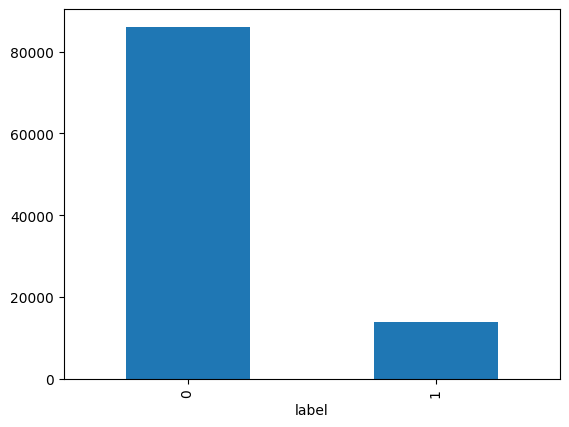

In [6]:
# Question: What is the distribution of the target variable (label)?
# Here we visualize the proportion of each class in the target variable
df['label'].value_counts().plot(kind='bar')
plt.show()

In [7]:
 
print("Purchase percentage:\n", df['label'].value_counts(normalize=True)*100)

Purchase percentage:
 label
0    86.072
1    13.928
Name: proportion, dtype: float64


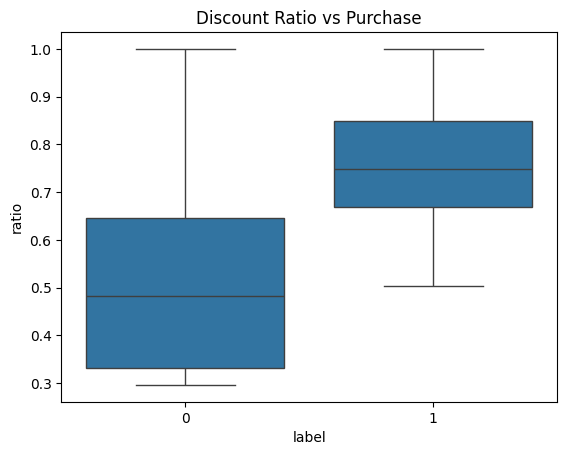

In [8]:
# Question: How does discount ratio differ between purchased (1) vs not purchased (0)?
# This boxplot shows the distribution of discount ratio for each label class.
# It helps to see if higher discounts are associated with more purchases.
sns.boxplot(x='label', y='ratio', data=df)
plt.title('Discount Ratio vs Purchase')
plt.show()

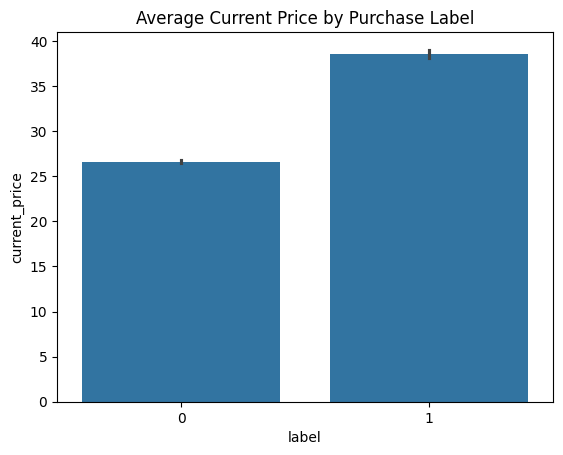

In [9]:
# Compare average current prices between customers who purchased vs those who didn't
# This analysis helps understand the relationship between product pricing and purchase behavior
sns.barplot(x='label', y='current_price', data=df, estimator=np.mean)
plt.title("Average Current Price by Purchase Label")
plt.show()


<Axes: xlabel='category', ylabel='count'>

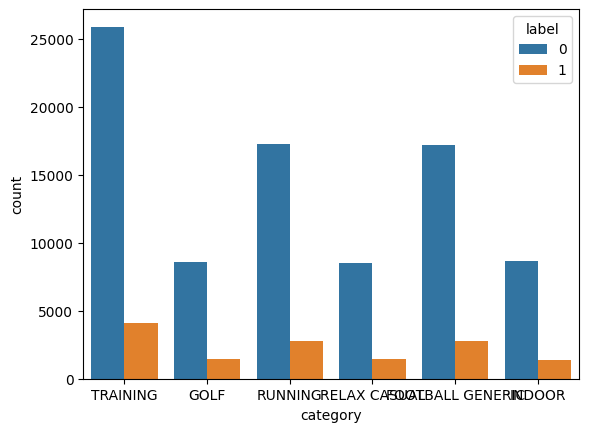

In [10]:
# Analyze purchase behavior across different product categories
# This chart shows the distribution of purchasers vs non-purchasers for each product category
sns.countplot(x='category', hue='label', data=df)

In [11]:
df

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,style,sizes,gender,rgb_r_main_col,rgb_g_main_col,rgb_b_main_col,rgb_r_sec_col,rgb_g_sec_col,rgb_b_sec_col,label
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,205,104,57,255,187,255,0
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,188,238,104,255,187,255,0
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,205,173,0,255,187,255,0
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",kids,205,140,149,164,211,238,0
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,regular,"xxs,xs,s,m,l,xl,xxl",women,138,43,226,164,211,238,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,wide,"xxs,xs,s,m,l,xl,xxl",women,79,148,205,164,211,238,0
99996,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,wide,"xs,s,m,l,xl",unisex,139,26,26,205,155,155,0
99997,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,wide,"xxs,xs,s,m,l,xl,xxl",women,135,206,250,205,155,155,0
99998,Germany,PW6278,227,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,slim,"xxs,xs,s,m,l,xl,xxl",women,181,181,181,205,155,155,0


In [12]:
df.nunique()

country              3
article            477
sales              476
regular_price      123
current_price      141
ratio             2722
retailweek         123
promo1               2
promo2               2
customer_id       4549
article.1           10
productgroup         4
category             6
cost                10
style                3
sizes                2
gender               4
rgb_r_main_col       7
rgb_g_main_col      10
rgb_b_main_col      10
rgb_r_sec_col        3
rgb_g_sec_col        3
rgb_b_sec_col        3
label                2
dtype: int64

In [13]:
df.isnull().sum() 

country           0
article           0
sales             0
regular_price     0
current_price     0
ratio             0
retailweek        0
promo1            0
promo2            0
customer_id       0
article.1         0
productgroup      0
category          0
cost              0
style             0
sizes             0
gender            0
rgb_r_main_col    0
rgb_g_main_col    0
rgb_b_main_col    0
rgb_r_sec_col     0
rgb_g_sec_col     0
rgb_b_sec_col     0
label             0
dtype: int64

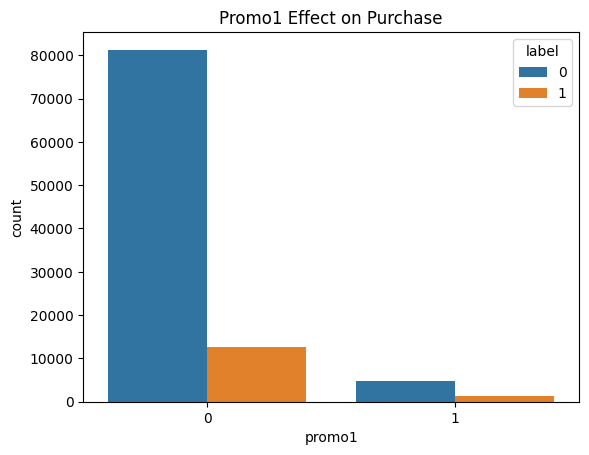

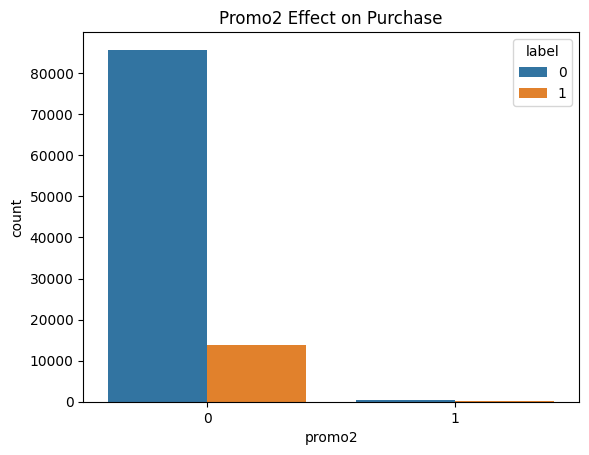

In [14]:
# Analyze the effectiveness of promotional campaigns on purchase behavior
# Promo1 = Media advertisements, Promo2 = Store events

sns.countplot(x='promo1', hue='label', data=df)
plt.title('Promo1 Effect on Purchase')
plt.show()

sns.countplot(x='promo2', hue='label', data=df)
plt.title('Promo2 Effect on Purchase')
plt.show()

<Axes: xlabel='category'>

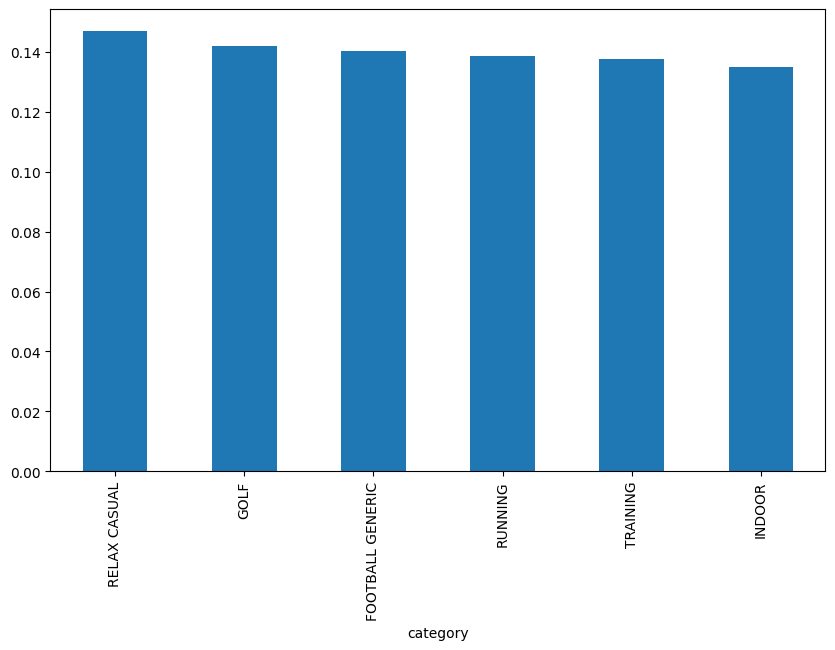

In [15]:
 
category_summary = df.groupby('category')['label'].mean().sort_values(ascending=False)
 
plt.figure(figsize=(10,6))
category_summary.plot(kind='bar')

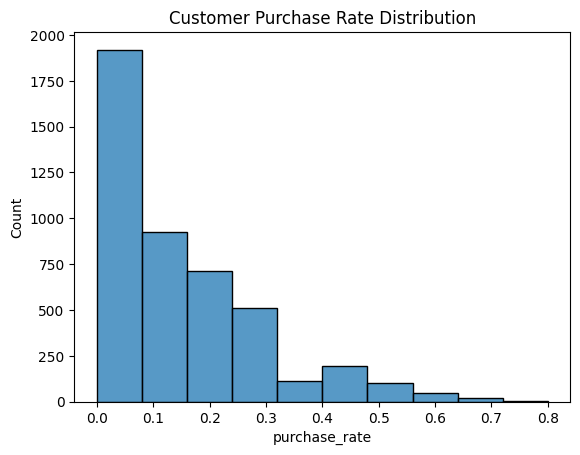

In [16]:
# Analyze individual customer purchase behavior patterns
# Creates customer-level metrics: total offers received, purchases made, and purchase rate
customer_summary = df.groupby('customer_id')['label'].agg(['count','sum','mean']).reset_index()
customer_summary.rename(columns={'count':'total_offers','sum':'purchases','mean':'purchase_rate'}, inplace=True)

sns.histplot(customer_summary['purchase_rate'], bins=10)
plt.title('Customer Purchase Rate Distribution')
plt.show()


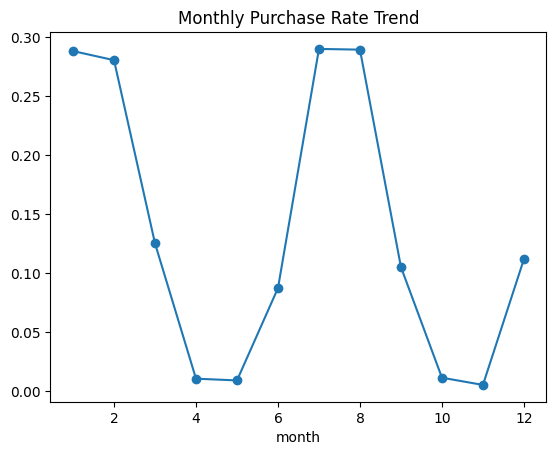

In [17]:
# Analyze seasonal trends in purchase behavior throughout the year
# Converts retailweek to datetime and extracts month for temporal analysis
df['retailweek'] = pd.to_datetime(df['retailweek'])
df['month'] = df['retailweek'].dt.month
monthly_trend = df.groupby('month')['label'].mean()
monthly_trend.plot(marker='o')
plt.title("Monthly Purchase Rate Trend")
plt.show()


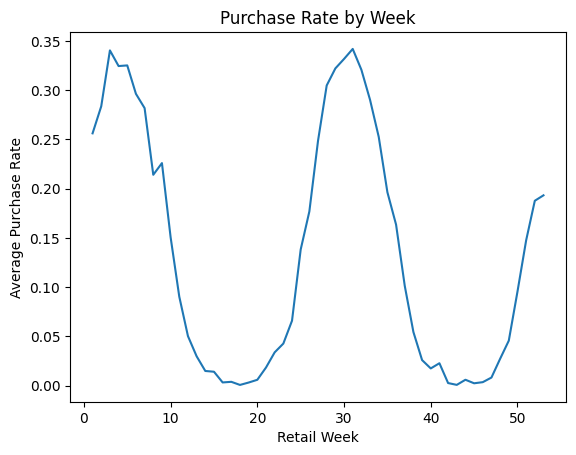

In [18]:

# Analyze weekly purchase patterns throughout the year for detailed seasonal trends
# Uses ISO calendar weeks to show precise weekly performance variations
df['retailweek'] = pd.to_datetime(df['retailweek'])
df.groupby(df['retailweek'].dt.isocalendar().week)['label'].mean().plot()
plt.title('Purchase Rate by Week')
plt.xlabel('Retail Week')
plt.ylabel('Average Purchase Rate')
plt.show()

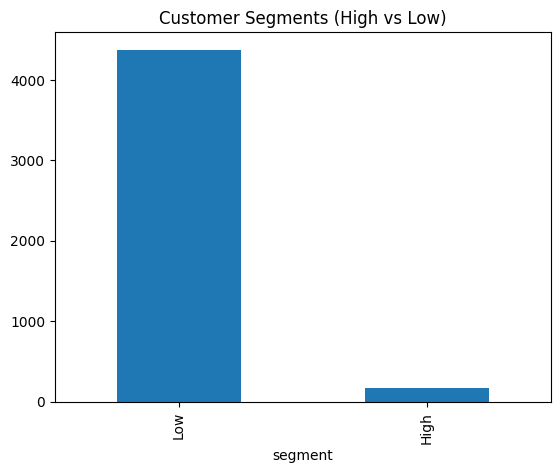

In [19]:
# Calculate individual customer purchase rates and segment them into high/low value categories
customer_summary = df.groupby('customer_id')['label'].mean().reset_index()
customer_summary['segment'] = np.where(customer_summary['label']>=0.5, 'High', 'Low')
customer_summary['segment'].value_counts().plot(kind='bar')
plt.title("Customer Segments (High vs Low)")
plt.show()

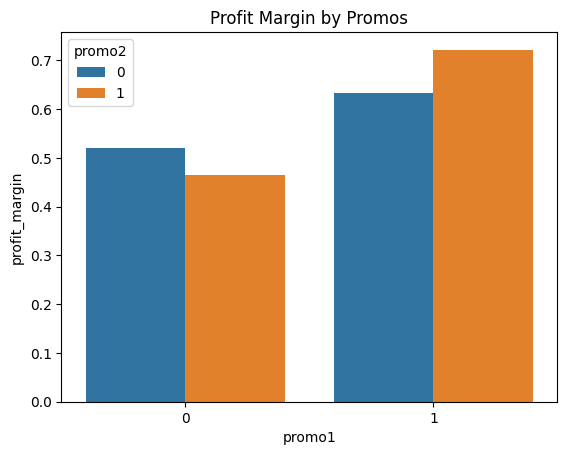

In [20]:
# Calculate profit margins and analyze how promotional activities affect profitability
# Profit margin = (selling price - cost) / selling price, showing percentage profit per sale
df['profit_margin'] = (df['current_price']-df['cost'])/df['current_price']
promo_margin = df.groupby(['promo1','promo2'])['profit_margin'].mean().reset_index()
sns.barplot(x='promo1', y='profit_margin', hue='promo2', data=promo_margin)
plt.title("Profit Margin by Promos")
plt.show()

C:\Users\O\AppData\Local\Temp\ipykernel_20824\3190272302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purchase_rate_by_gender.index, y=purchase_rate_by_gender.values, palette="Set2")


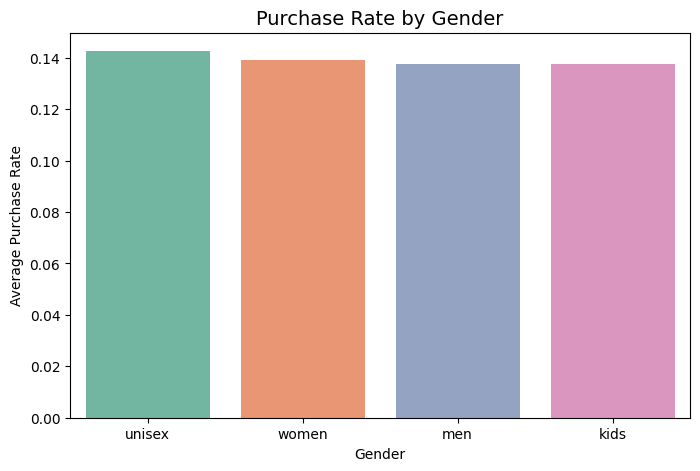

In [21]:
# Ranks genders by conversion rate to identify which segments respond best to marketing campaigns

purchase_rate_by_gender = df.groupby('gender')['label'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=purchase_rate_by_gender.index, y=purchase_rate_by_gender.values, palette="Set2")
plt.title('Purchase Rate by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Average Purchase Rate')
plt.show()


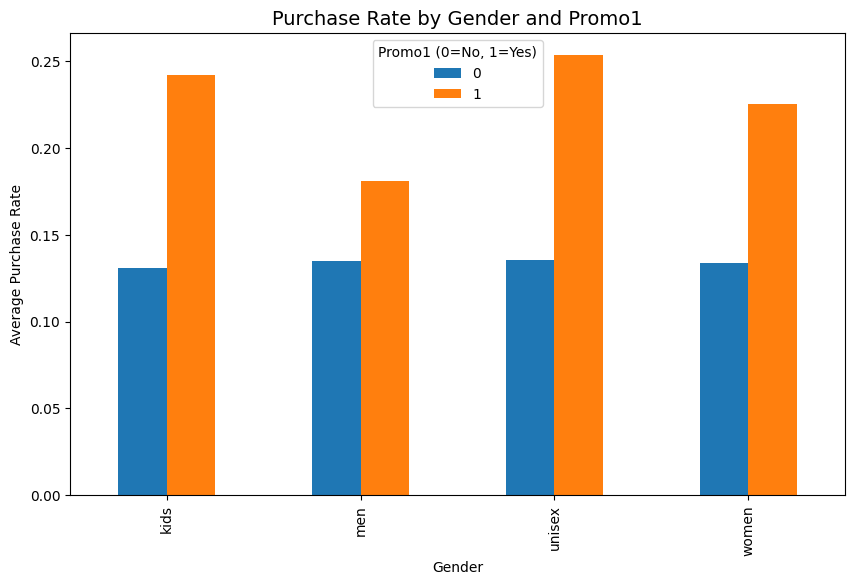

In [22]:
# Shows how different gender segments respond to promotional campaigns vs non-promotional periods

promo_effect = df.groupby(['gender','promo1'])['label'].mean().unstack()

promo_effect.plot(kind='bar', figsize=(10,6))
plt.title("Purchase Rate by Gender and Promo1", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Average Purchase Rate")
plt.legend(title="Promo1 (0=No, 1=Yes)")
plt.show()


In [23]:
df['profit_margin'] = (df['current_price'] - df['cost']) / df['current_price']
 
promo1_margin = df.groupby('promo1')['profit_margin'].mean()

 
promo2_margin = df.groupby('promo2')['profit_margin'].mean()

print("Average Profit Margin by Promo1:")
print(promo1_margin)

print("\nAverage Profit Margin by Promo2:")
print(promo2_margin)


Average Profit Margin by Promo1:
promo1
0    0.519205
1    0.634897
Name: profit_margin, dtype: float64

Average Profit Margin by Promo2:
promo2
0    0.526382
1    0.523132
Name: profit_margin, dtype: float64


C:\Users\O\AppData\Local\Temp\ipykernel_20824\746183427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo1_margin.index, y=promo1_margin.values, ax=axes[0], palette="viridis")
C:\Users\O\AppData\Local\Temp\ipykernel_20824\746183427.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo2_margin.index, y=promo2_margin.values, ax=axes[1], palette="magma")


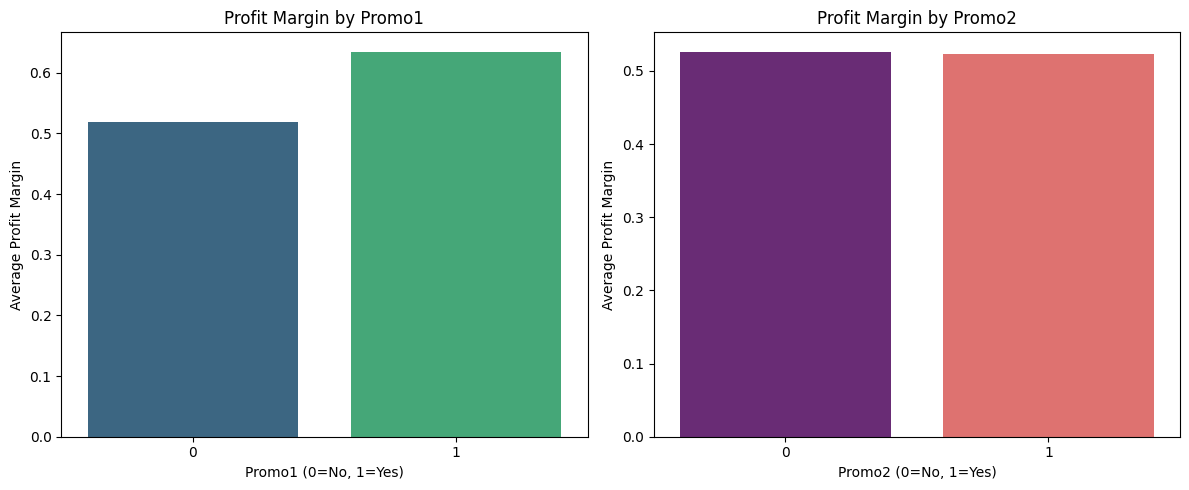

In [24]:
# Side-by-side analysis shows how media ads (promo1) and store events (promo2) affect profitability

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.barplot(x=promo1_margin.index, y=promo1_margin.values, ax=axes[0], palette="viridis")
axes[0].set_title("Profit Margin by Promo1")
axes[0].set_xlabel("Promo1 (0=No, 1=Yes)")
axes[0].set_ylabel("Average Profit Margin")

sns.barplot(x=promo2_margin.index, y=promo2_margin.values, ax=axes[1], palette="magma")
axes[1].set_title("Profit Margin by Promo2")
axes[1].set_xlabel("Promo2 (0=No, 1=Yes)")
axes[1].set_ylabel("Average Profit Margin")

plt.tight_layout()
plt.show()


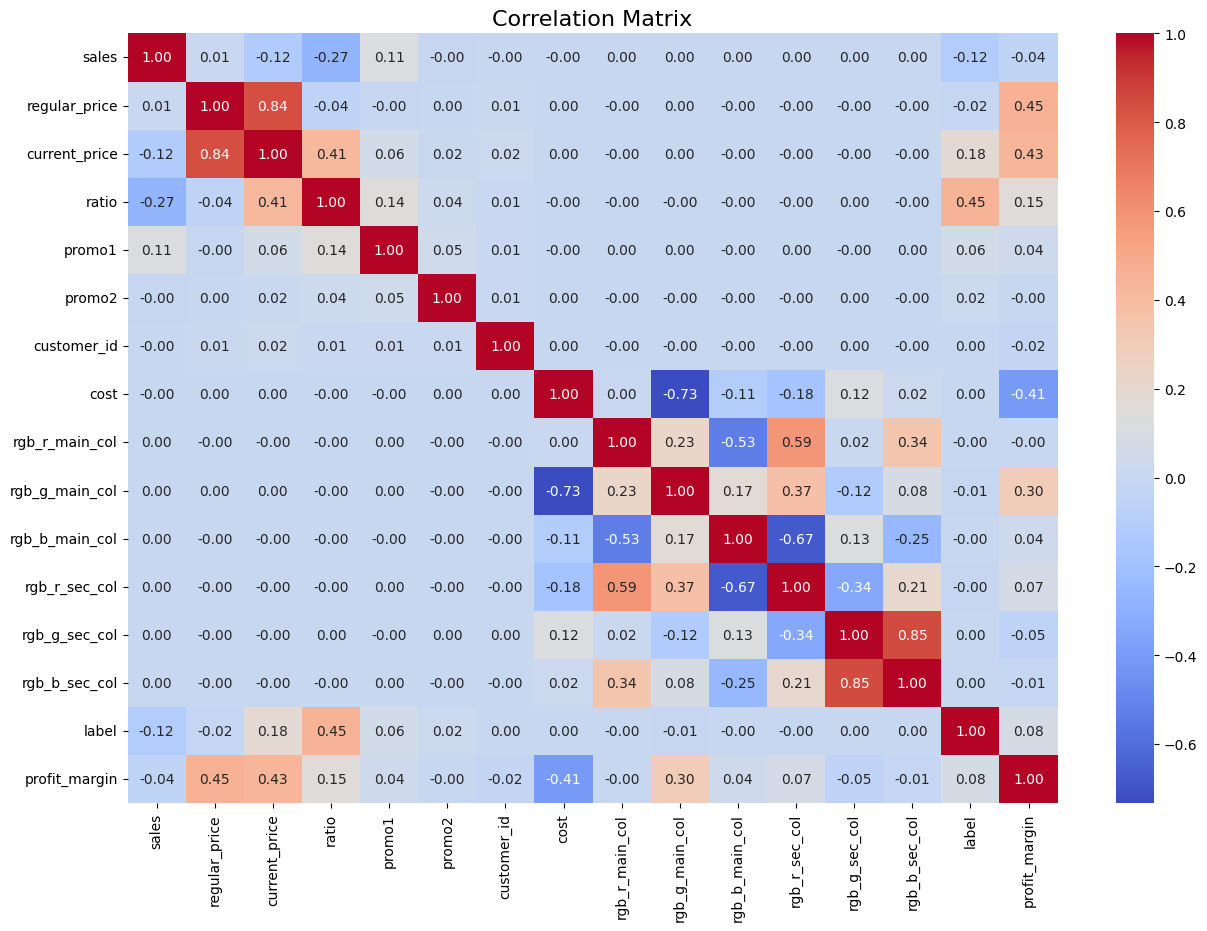

In [25]:
numeric_cols = df.select_dtypes(include=['float64','int64'])
corr = numeric_cols.corr()
plt.figure(figsize=(15,10))   
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16)
plt.show()


In [26]:
pivot = df.pivot_table(index='category', columns='promo1', values='label', aggfunc='mean')
print("\nPivot Table: Purchase Rate by Category and Promo1\n", pivot)


Pivot Table: Purchase Rate by Category and Promo1
 promo1                   0         1
category                            
FOOTBALL GENERIC  0.135007  0.217286
GOLF              0.134634  0.248788
INDOOR            0.130050  0.206785
RELAX CASUAL      0.141563  0.224556
RUNNING           0.132129  0.237480
TRAINING          0.131756  0.222402


# Data Cleaning

In [27]:
# Remove duplicate rows and show how many were dropped
initial_rows = len(df)                 
df = df.drop_duplicates()               
dropped_dups = initial_rows - len(df)  

print(f"Dropped {dropped_dups} exact duplicate rows")
print(f"Rows before: {initial_rows}, Rows after: {len(df)}")


Dropped 0 exact duplicate rows
Rows before: 100000, Rows after: 100000


In [28]:
# Detect and cap outliers in numeric columns using IQR method

def iqr_cap_series(s, k=1.5):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k*iqr
    upper = q3 + k*iqr
    return lower, upper

numeric_for_outliers = ['current_price','regular_price','sales','cost','ratio']
n_rows = len(df)

for col in numeric_for_outliers:
    if col in df.columns:
        lower, upper = iqr_cap_series(df[col].dropna())
        
        n_low = (df[col] < lower).sum()
        n_high = (df[col] > upper).sum()
        total_outliers = n_low + n_high
        perc_outliers = (total_outliers / n_rows) * 100
        print(f"[{col}] IQR lower={lower:.2f}, upper={upper:.2f}, "
              f"below={n_low}, above={n_high}, "
              f"total outliers={total_outliers} ({perc_outliers:.2f}%)")
      
        df[col] = df[col].clip(lower=lower, upper=upper)

 

[current_price] IQR lower=-27.05, upper=76.95, below=0, above=4480, total outliers=4480 (4.48%)
[regular_price] IQR lower=-55.05, upper=160.95, below=0, above=280, total outliers=280 (0.28%)
[sales] IQR lower=-71.00, upper=145.00, below=0, above=9540, total outliers=9540 (9.54%)
[cost] IQR lower=-8.68, upper=20.56, below=0, above=0, total outliers=0 (0.00%)
[ratio] IQR lower=-0.16, upper=1.22, below=0, above=0, total outliers=0 (0.00%)


# Feature Engineering

In [29]:
# Create new business metrics: discount percentage and profit margin for enhanced analysis
# discount = actual discount given (0.2 = 20% off), profit_margin = profit as % of price (0.4 = 40% profit)

if set(['ratio']).issubset(df.columns):
    df['discount'] = (1 - df['ratio']).clip(lower=0)
    print("Created 'discount' = 1 - ratio (clipped at 0)")

 
if set(['current_price','cost']).issubset(df.columns):
    df['profit_margin'] = ((df['current_price'] - df['cost']) / df['current_price']) \
                            .replace([np.inf, -np.inf], np.nan).fillna(0)
    print("Created 'profit_margin' from current_price and cost")


Created 'discount' = 1 - ratio (clipped at 0)
Created 'profit_margin' from current_price and cost


In [30]:
# Extract temporal features from retail week dates for time-based analysis
# Creates week number (1-52) and month (1-12) for seasonal trend analysis

df['week_of_year'] = df['retailweek'].dt.isocalendar().week
df['month'] = df['retailweek'].dt.month


In [31]:
# Create interaction features combining discount levels with promotional activities
# discount_promo1/2: discount amount when promotions active, promo1_promo2: both campaigns running together
df['discount_promo1'] = df['discount'] * df['promo1']
df['discount_promo2'] = df['discount'] * df['promo2']
df['promo1_promo2'] = df['promo1'] * df['promo2']

In [32]:
# Apply logarithmic transformation to numerical features to handle skewed distributions

for col in ['current_price','discount','profit_margin']:
    if col in df.columns:
        df[f'log_{col}'] = np.log1p(df[col].clip(lower=0))
        print(f"Created log transform for {col}")

Created log transform for current_price
Created log transform for discount
Created log transform for profit_margin


In [33]:
# Calculate total profit per transaction by multiplying unit profit by quantity sold

df['profit']  = (df['current_price'] - df['cost']) * df['sales']
 

In [34]:
df

,country,article,sales,regular_price,current_price,ratio,retailweek,promo1,promo2,customer_id,...,profit_margin,discount,week_of_year,discount_promo1,discount_promo2,promo1_promo2,log_current_price,log_discount,log_profit_margin,profit
0,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,-2.364557,0.336134,12,0.0,0.0,0,1.599388,0.289781,0.000000,-261.52
1,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,0.420253,0.336134,12,0.0,0.0,0,1.599388,0.289781,0.350835,46.48
2,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,0.569620,0.336134,12,0.0,0.0,0,1.599388,0.289781,0.450834,63.00
3,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,-1.278481,0.336134,12,0.0,0.0,0,1.599388,0.289781,0.000000,-141.40
4,Germany,YN8639,28,5.95,3.95,0.663866,2016-03-27,0,0,1003.0,...,-1.430380,0.336134,12,0.0,0.0,0,1.599388,0.289781,0.000000,-158.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Germany,PW6278,145,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,0.844156,0.534944,25,0.0,0.0,0,3.330417,0.428494,0.612022,3298.75
99996,Germany,PW6278,145,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,0.632653,0.534944,25,0.0,0.0,0,3.330417,0.428494,0.490206,2472.25
99997,Germany,PW6278,145,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,0.807050,0.534944,25,0.0,0.0,0,3.330417,0.428494,0.591696,3153.75
99998,Germany,PW6278,145,57.95,26.95,0.465056,2016-06-26,0,0,1489.0,...,0.952134,0.534944,25,0.0,0.0,0,3.330417,0.428494,0.668923,3720.70


# Data Preprocessing

In [35]:
# Drops unnecessary columns from the DataFrame, including specific ones and any columns starting with 'rgb_'

drop_cols = [ 'customer_id', 'article.1',"article","productgroup","retailweek","regular_price"]


rgb_cols = [col for col in df.columns if col.startswith('rgb_')]

 
all_drop = drop_cols + rgb_cols
df = df.drop(columns=[col for col in all_drop if col in df.columns])

print(f"Dropped columns: {all_drop}")


Dropped columns: ['customer_id', 'article.1', 'article', 'productgroup', 'retailweek', 'regular_price', 'rgb_r_main_col', 'rgb_g_main_col', 'rgb_b_main_col', 'rgb_r_sec_col', 'rgb_g_sec_col', 'rgb_b_sec_col']


In [36]:
# Defines categorical and numerical feature columns
# Separates features (X) and target (y) from the DataFrame

categorical_cols = ['gender', 'country', 'category', 'style',"sizes","week_of_year","month"]
numerical_cols = ['sales', 'current_price', 'cost',"profit_margin","discount",'discount_promo1', 'discount_promo2', 'promo1_promo2']

X = df.drop(columns=['label'])
y = df['label']

In [37]:
# Splits the dataset into training and testing sets (80/20) with stratification to preserve target distribution

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Target distribution before SMOTE:", y_train.value_counts(normalize=True))


Target distribution before SMOTE: label
0    0.860725
1    0.139275
Name: proportion, dtype: float64


In [38]:
# Creates a ColumnTransformer to preprocess features:
# - One-hot encodes categorical columns (dropping the first category to avoid multicollinearity)
# - Standardizes numerical columns using StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ],
  
)

In [39]:
# Fits the preprocessor on the training data and transforms both training and test sets

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Before SMOTE:", np.bincount(y_train))

Before SMOTE: [68858 11142]


In [40]:
# Applies BorderlineSMOTE to balance the classes in the training set

smote = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

print("After SMOTE:", np.bincount(y_train_resampled))

After SMOTE: [68858 68858]


# Model Training

In [41]:
# Defines a dictionary of machine learning models with tuned hyperparameters:
# - Logistic Regression with balanced class weights
# - Random Forest with max depth, class balancing, and parallel processing
# - XGBoost and LightGBM with scale_pos_weight to handle class imbalance

models = {
    'LogisticRegression': LogisticRegression(
        max_iter=1000, class_weight='balanced', random_state=42, solver='saga'
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=300, max_depth=10, class_weight='balanced', random_state=42, n_jobs=-1
    ),
    'XGBoost': XGBClassifier(
        n_estimators=500, max_depth=6, learning_rate=0.1,
        scale_pos_weight=int(y_train_resampled.value_counts()[0]/y_train_resampled.value_counts()[1]),
        random_state=42, n_jobs=-1
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=500, max_depth=6,
        scale_pos_weight=int(y_train_resampled.value_counts()[0]/y_train_resampled.value_counts()[1]),
        random_state=42, n_jobs=-1
    )
} 

In [42]:
# Trains each model on the resampled training data, evaluates on the test set,

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:,1]

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    results[name] = {
        'f1_1': classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],
        'roc_auc': roc_auc_score(y_test, y_proba)
    }


Training LogisticRegression...

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     17214
           1       0.34      0.85      0.48      2786

    accuracy                           0.75     20000
   macro avg       0.65      0.79      0.66     20000
weighted avg       0.88      0.75      0.78     20000

ROC-AUC Score: 0.8542505365713863
Confusion Matrix:
[[12568  4646]
 [  415  2371]]

Training RandomForest...

RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.67      0.79     17214
           1       0.31      0.93      0.47      2786

    accuracy                           0.70     20000
   macro avg       0.65      0.80      0.63     20000
weighted avg       0.89      0.70      0.75     20000

ROC-AUC Score: 0.8425120340202898
Confusion Matrix:
[[11467  5747]
 [  197  2589]]

Training XGBoost...

XGBoost Classificati

c:\Users\O\Desktop\New folder\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\O\Desktop\New folder\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     17214
           1       0.39      0.25      0.31      2786

    accuracy                           0.84     20000
   macro avg       0.64      0.59      0.61     20000
weighted avg       0.82      0.84      0.83     20000

ROC-AUC Score: 0.8430451127819548
Confusion Matrix:
[[16121  1093]
 [ 2088   698]]


In [43]:
# Prints a summary of all models showing F1-score for class 1 and ROC-AUC score for easy comparison

print("\nSummary of Models (F1-score class 1 & ROC-AUC):")
for name, metrics in results.items():
    print(f"{name}: F1(class 1)={metrics['f1_1']:.3f}, ROC-AUC={metrics['roc_auc']:.3f}")


Summary of Models (F1-score class 1 & ROC-AUC):
LogisticRegression: F1(class 1)=0.484, ROC-AUC=0.854
RandomForest: F1(class 1)=0.466, ROC-AUC=0.843
XGBoost: F1(class 1)=0.424, ROC-AUC=0.848
LightGBM: F1(class 1)=0.305, ROC-AUC=0.843


# Hyperparameter Tuning

In [44]:
# Optimizes Logistic Regression hyperparameters with Optuna using F1-score for class 1 and 3-fold CV

f1_scorer = make_scorer(f1_score, pos_label=1)

 
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 10)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    
    model = LogisticRegression(
        C=C,
        penalty=penalty,
        solver='saga',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    )
    
    score = cross_val_score(
        model,
        X_train_resampled, 
        y_train_resampled,
        cv=3,
        scoring=f1_scorer,
        n_jobs=-1
    )
    return score.mean()

 
n_trials = 50 

 
pbar = tqdm(total=n_trials)

def progress_callback(study, trial):
    pbar.update(1)

 
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=n_trials, callbacks=[progress_callback])

pbar.close()

 
print("Best params:", study.best_params)
print("Best F1:", study.best_value)

 
results_df = study.trials_dataframe()
print(results_df.head())

 


  0%|          | 0/50 [00:00<?, ?it/s][I 2025-09-13 02:13:16,293] A new study created in memory with name: no-name-21fb5d9b-b38c-4dee-951f-5e095580822f
C:\Users\O\AppData\Local\Temp\ipykernel_20824\3502896203.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 10)
[I 2025-09-13 02:13:41,208] Trial 0 finished with value: 0.823153861227818 and parameters: {'C': 0.4256008270055227, 'penalty': 'l2'}. Best is trial 0 with value: 0.823153861227818.
  2%|▏         | 1/50 [00:24<20:20, 24.92s/it]C:\Users\O\AppData\Local\Temp\ipykernel_20824\3502896203.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e

Best params: {'C': 5.9309365170147705, 'penalty': 'l2'}
Best F1: 0.8233711744280617
   number     value             datetime_start          datetime_complete  \
0       0  0.823154 2025-09-13 02:13:16.295391 2025-09-13 02:13:41.208552   
1       1  0.814929 2025-09-13 02:13:41.211042 2025-09-13 02:13:49.264398   
2       2  0.820726 2025-09-13 02:13:49.265433 2025-09-13 02:14:42.597076   
3       3  0.823251 2025-09-13 02:14:42.597076 2025-09-13 02:15:36.897000   
4       4  0.814588 2025-09-13 02:15:36.899000 2025-09-13 02:15:45.812834   

                duration  params_C params_penalty     state  
0 0 days 00:00:24.913161  0.425601             l2  COMPLETE  
1 0 days 00:00:08.053356  0.001244             l1  COMPLETE  
2 0 days 00:00:53.331643  0.010917             l2  COMPLETE  
3 0 days 00:00:54.299924  1.484276             l2  COMPLETE  
4 0 days 00:00:08.913834  0.002915             l1  COMPLETE  


In [45]:
# Trains the Logistic Regression model with the best hyperparameters on the resampled training data
# Evaluates its performance on the test set using classification report, ROC-AUC, and confusion matrix
 
best_params = study.best_params

 
best_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver='saga',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

 
best_model.fit(X_train_resampled, y_train_resampled)

 
y_pred = best_model.predict(X_test_processed)
y_proba = best_model.predict_proba(X_test_processed)[:, 1]

 
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     17214
           1       0.34      0.85      0.48      2786

    accuracy                           0.75     20000
   macro avg       0.65      0.79      0.66     20000
weighted avg       0.88      0.75      0.78     20000

ROC-AUC Score: 0.8541115196891027

Confusion Matrix:
[[12563  4651]
 [  417  2369]]


c:\Users\O\Desktop\New folder\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


c:\Users\O\Desktop\New folder\.venv\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


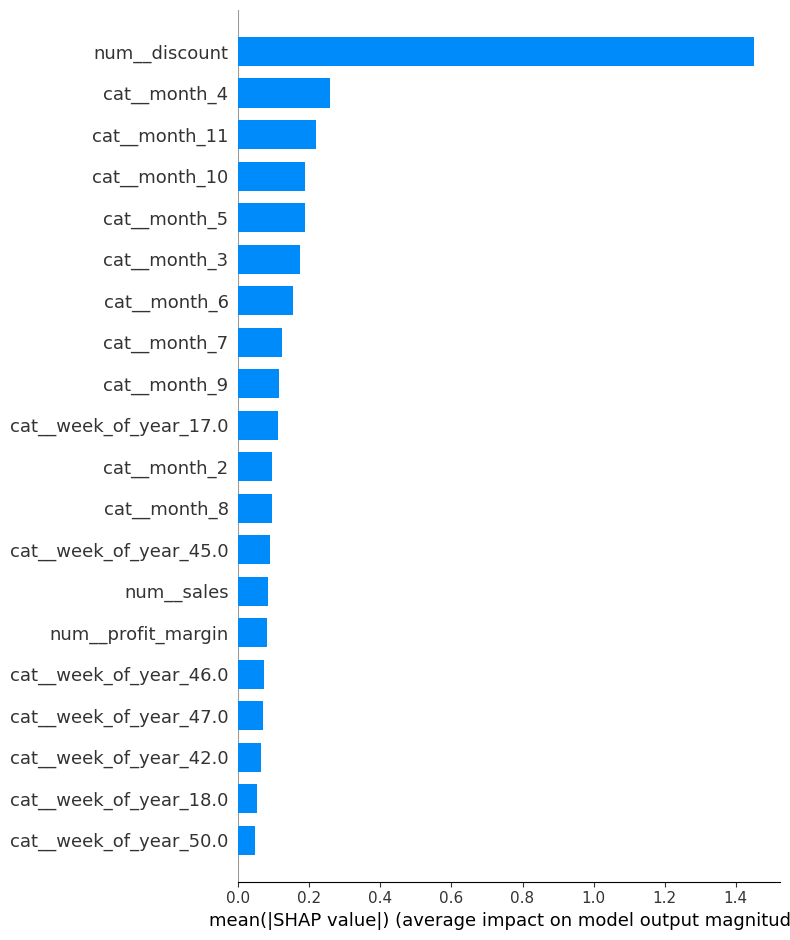

In [46]:
# Computes and plots SHAP feature importance for the trained Logistic Regression model

X_train_sample = X_train_resampled[:5000]  
X_test_sample = X_test_processed[:2000]    


explainer = shap.LinearExplainer(best_model, X_train_sample, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_sample)

shap.summary_plot(shap_values, X_test_sample, feature_names=preprocessor.get_feature_names_out(), plot_type="bar")



In [47]:
# Performs hyperparameter tuning for XGBoost using Optuna:
# - Optimizes F1-score for class 1 with 3-fold cross-validation
# - Searches over key XGBoost hyperparameters including n_estimators, max_depth, learning_rate, and regularization
# - Tracks progress with a tqdm progress bar and prints the best parameters and F1-score

f1_scorer = make_scorer(f1_score, pos_label=1)

 
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1, 10)  
    }
    
    model = XGBClassifier(
        **params,
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        eval_metric="logloss"
    )
    
    score = cross_val_score(
        model,
        X_train_resampled,
        y_train_resampled,
        cv=3,
        scoring=f1_scorer,
        n_jobs=-1
    )
    return score.mean()

 
n_trials = 50
pbar = tqdm(total=n_trials)

def progress_callback(study, trial):
    pbar.update(1)

 
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=n_trials, callbacks=[progress_callback])
pbar.close()

 
print("Best params:", study.best_params)
print("Best F1:", study.best_value)

 

  0%|          | 0/50 [00:00<?, ?it/s][I 2025-09-13 03:05:14,289] A new study created in memory with name: no-name-cd87d0bb-c4ad-48c7-a612-11da349bc54b
[I 2025-09-13 03:05:29,352] Trial 0 finished with value: 0.8340250275030986 and parameters: {'n_estimators': 450, 'max_depth': 11, 'learning_rate': 0.11270118039507111, 'subsample': 0.6440128456223455, 'colsample_bytree': 0.7482996852246581, 'gamma': 4.921358178755884, 'reg_alpha': 1.0106806277847213, 'reg_lambda': 8.308110226204677, 'scale_pos_weight': 9.631225468834913}. Best is trial 0 with value: 0.8340250275030986.
100%|██████████| 50/50 [06:53<00:00,  8.27s/it]

Best params: {'n_estimators': 130, 'max_depth': 3, 'learning_rate': 0.1985885861273724, 'subsample': 0.9206694807692181, 'colsample_bytree': 0.5053768714623472, 'gamma': 3.649235948874743, 'reg_alpha': 5.9559838025005325, 'reg_lambda': 0.3310520931860342, 'scale_pos_weight': 1.196651236309459}
Best F1: 0.848344250360458


In [48]:
# Trains the XGBoost model with the best hyperparameters on the resampled training data
# Evaluates its performance on the test set using classification report, ROC-AUC, and confusion matrix
 
best_model = XGBClassifier(
    **study.best_params,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric="logloss"
)

best_model.fit(X_train_resampled, y_train_resampled)

 
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_pred = best_model.predict(X_test_processed)
y_proba = best_model.predict_proba(X_test_processed)[:,1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


c:\Users\O\Desktop\New folder\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:12:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     17214
           1       0.33      0.85      0.48      2786

    accuracy                           0.74     20000
   macro avg       0.65      0.79      0.65     20000
weighted avg       0.88      0.74      0.78     20000

ROC-AUC Score: 0.8492145160398417

Confusion Matrix:
[[12505  4709]
 [  425  2361]]


In [3]:
 
benchmark_results_full = {
    "Model": ["LogisticRegression", "RandomForest", "XGBoost", "LightGBM"],
    "Precision (class 0)": [0.97, 0.98, 0.97, 0.89],
    "Recall (class 0)":    [0.73, 0.67, 0.73, 0.94],
    "F1-score (class 0)":  [0.83, 0.79, 0.83, 0.91],
    "Precision (class 1)": [0.34, 0.31, 0.33, 0.39],
    "Recall (class 1)":    [0.85, 0.93, 0.85, 0.25],
    "F1-score (class 1)":  [0.48, 0.47, 0.48, 0.31],
    "Accuracy":            [0.75, 0.70, 0.74, 0.84],
    "ROC-AUC":             [0.8541, 0.8425, 0.8492, 0.8430]
}

benchmark_df_full = pd.DataFrame(benchmark_results_full)
benchmark_df_full


,Model,Precision (class 0),Recall (class 0),F1-score (class 0),Precision (class 1),Recall (class 1),F1-score (class 1),Accuracy,ROC-AUC
0,LogisticRegression,0.97,0.73,0.83,0.34,0.85,0.48,0.75,0.8541
1,RandomForest,0.98,0.67,0.79,0.31,0.93,0.47,0.70,0.8425
2,XGBoost,0.97,0.73,0.83,0.33,0.85,0.48,0.74,0.8492
3,LightGBM,0.89,0.94,0.91,0.39,0.25,0.31,0.84,0.8430
